In [42]:
import shelve
import pandas as pd
from scipy.spatial import distance
import numpy as np
import chess
from PIL import Image
from io import BytesIO

import cairosvg
import chess
import chess.svg

import matplotlib.pyplot as plt

In [22]:
sh = shelve.open(f"/media/ap/storage/stockfish_data/distance_dataset")
arrays = sh["arrays"] 
concept_data = sh["concept_data"]
sh.close()

df = pd.DataFrame(concept_data)
df['array1'] = arrays['layer1']
df['array3'] = arrays['layer3']
df['array2'] = [a.flatten() for a in arrays['layer2']]
df['array4'] = [a.flatten() for a in arrays['layer4']]

df = df.drop_duplicates('fen')
print(f'df shape: {df.shape}')

df shape: (96215, 6)


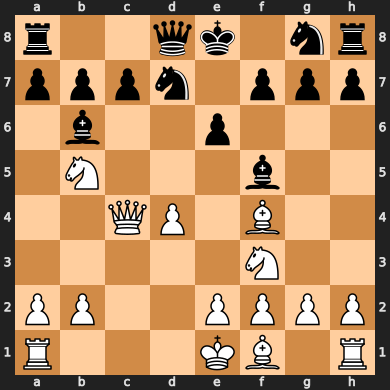

In [36]:
array_name = 'array3'
index = 103
chosen_sample = df.iloc[index]
idx = chosen_sample.name


board = chess.Board(chosen_sample['fen'])
board


[]

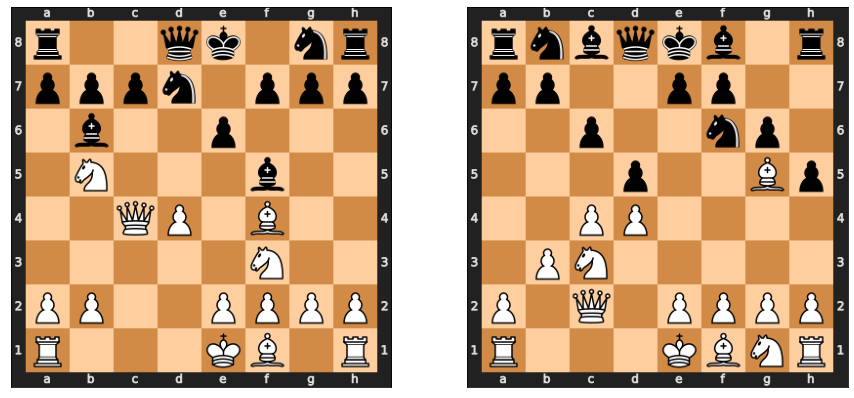

In [44]:

lowest_dist = 1e5
current_nearest = None

for idx_, row in df.iterrows():
    if idx_ != idx:
        dist = np.linalg.norm(chosen_sample[array_name]-row[array_name])
        if dist < lowest_dist:
            current_nearest = idx_
            lowest_dist = dist

nearest_board = chess.Board(df.loc[current_nearest].fen)



fig, (ax1, ax2) = plt.subplots(1,2, figsize = (15,10))

svg = chess.svg.board(board)
img = cairosvg.svg2png(svg)
img = Image.open(BytesIO(img))
ax1_plot = ax1.imshow(img)
ax1.set_xticks([])
ax1.set_yticks([])

svg = chess.svg.board(nearest_board)
img = cairosvg.svg2png(svg)
img = Image.open(BytesIO(img))
ax2_plot = ax2.imshow(img)
ax2.set_xticks([])
ax2.set_yticks([])




In [10]:
df.head()

,fen,bucket
0,rn2r1k1/1p3pb1/2p1p1p1/3pNb1p/p1PPn2P/P3B1P1/3...,[0.29092103]
1,r1b2rk1/ppq1bpp1/2p4p/2Pn4/1P1BN3/P5P1/1Q3PBP/...,[-0.21948314]
2,2kr3r/pp3p2/4pq1b/2pn3R/8/2NP3P/PPPBQ1P1/2KR4 ...,[-0.31015825]
3,r1b1kb1r/pp1n1ppp/2p5/3pP1n1/8/1PPB3P/P1QN1P1N...,[1.001527]
4,rnbqkbnr/pppppppp/8/8/8/5N2/PPPPPPPP/RNBQKB1R ...,[0.061321452]


In [11]:
arrays.keys()

dict_keys(['layer1', 'layer2', 'layer3', 'layer4'])

In [13]:
df.head()

,fen,bucket,array1
0,rn2r1k1/1p3pb1/2p1p1p1/3pNb1p/p1PPn2P/P3B1P1/3...,[0.29092103],"[-0.69868994, 0.3795238, 0.86597425, -1.378535..."
1,r1b2rk1/ppq1bpp1/2p4p/2Pn4/1P1BN3/P5P1/1Q3PBP/...,[-0.21948314],"[-0.50806874, 0.39143547, 0.6250784, -2.785937..."
2,2kr3r/pp3p2/4pq1b/2pn3R/8/2NP3P/PPPBQ1P1/2KR4 ...,[-0.31015825],"[-1.2366493, 0.33035377, 0.3879516, -2.8019743..."
3,r1b1kb1r/pp1n1ppp/2p5/3pP1n1/8/1PPB3P/P1QN1P1N...,[1.001527],"[-0.4429326, 1.4547801, 0.06964554, -3.3399785..."
4,rnbqkbnr/pppppppp/8/8/8/5N2/PPPPPPPP/RNBQKB1R ...,[0.061321452],"[-1.1179388, 0.45838726, 1.7346221, -4.4596143..."
